# HW 9 - Investigating Chaotic systems with python


## Excercise 1

Recall the Holling-Tanner Model of an ecological system

*Plants*  
$\dot{x} = x(1-x) - \frac{a_1x}{1+b_1x}y$  

*Herbivores*  
$\dot{y} = \frac{a_1x}{1+b_1x}y - d_1y-\frac{a_2y}{1+b_2y}z$  

*Carnivores*  
$\dot{z} = \frac{a_2y}{1+b_2y}z - d_2z$


Simulate these equations for at least two sets of initial conditions that are less than 1% apart using the following parameters  
`a1 = 5`  
`b1 = 3`  
`a2 = 0.1`  
`b2 = 2`  
`d1 = 0.4`  
`d2 = 0.01`  

Plot the results as both a time series and trajectories. What eventually happens to the trajectories?

In [1]:
import numpy as np 
import scipy as sp 
from scipy.integrate import odeint
import matplotlib.pyplot as plt 
from scipy.spatial import distance 
from scipy.signal import find_peaks

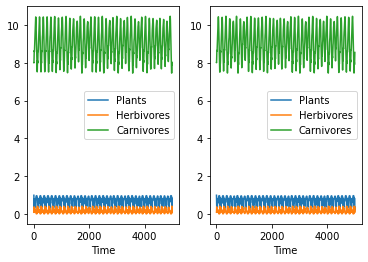

In [2]:
def HollingTanner(state, t0, a1=5, b1=3, a2=0.1, b2=2, d1=0.4, d2=0.01):
    x = state[0]
    y = state[1]
    z = state[2]
    
    dxdt = x*(1-x) - (a1*x/(1+ b1*x))*y  #plants
    dydt = (a1*x/(1+ b1*x))*y - d1*y - (a2*y/(1+ b2*y))*z #herbivores 
    dzdt = (a2*y/(1+b2*y))*z - d2*z #carnivores 
    
    return[dxdt, dydt, dzdt]


t = np.linspace(0,5000,10000)

plt.subplot(1,2,1)
state1 = np.array([1,0.1,8]) #initial condition #1 
state = odeint(HollingTanner, state1, t)
plt.plot(t, state)
plt.xlabel('Time')
plt.legend(('Plants', 'Herbivores', 'Carnivores'))

plt.subplot(1,2,2)
state2 = np.array([1,0.1,8.01]) #initial condition #2 
state = odeint(HollingTanner, state2, t)
plt.plot(t, state)
plt.xlabel('Time')
plt.legend(('Plants', 'Herbivores', 'Carnivores'))

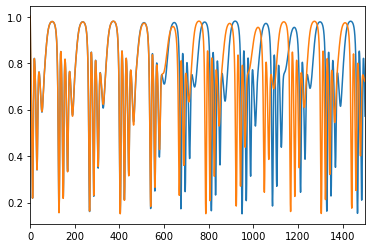

(0.0, 1500.0)

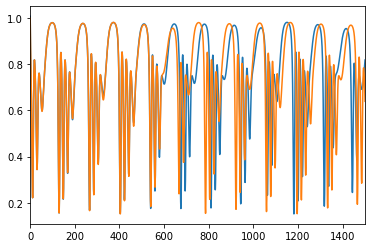

In [3]:
N_trajectories = 2 

plt.show()
x1 = np.array([1,0.1,8])+ 0.01*np.random.random((N_trajectories, 3))
state3 = np.asarray([odeint(HollingTanner, x1i, t)
                   for x1i in x1])

plt.plot(t, state3[0,:,0])
plt.plot(t, state3[1,:,0])
plt.xlim(0,1500)

plt.show()
x2 = np.array([1.,0.1,8.01])+ 0.01*np.random.random((N_trajectories, 3))
state4 = np.asarray([odeint(HollingTanner, x2i, t)
                   for x2i in x2])

plt.plot(t, state4[0,:,0])
plt.plot(t, state4[1,:,0])
plt.xlim(0,1500)

* The trajectories eventually decouple from each other over time
* It is evident that in the set of initial conditions that deviates by 1%, it decouples much more quickly

## Excercise 2
Recall that the concept of "sensitivity to initial conditions" can be given a precise definition.

Suppose $m_0$ and $n_0$ are two sets of initial conditions for the Holling-Tanner system and $d(m_0,n_0)$ is the distance between those points.

In the Holling-Tanner system $m_0$ and $n_0$ are points in 3-dimensional space, so the distance between them can be calculated using the standard formula for Euclidean distance:

$d(m,n) = \sqrt{(x_m-x_n)^2+(y_m-y_n)^2+(z_m-z_n)^2}$

After time $t$ the points $m_0$ and $n_0$ have been integrated to $m_t$ and $n_t$. Sensitivity dependance says that $d(m_t, n_t)$ grows exponentially with time with different levels of sensitivity being associated with different values of the lyapunov exponent $\lambda$, such that  

$d(m_t, n_t) = e^{\lambda t}d(m_0,n_0)$  

Approximate the lyapunov exponent for the Holling-Tanner system using the parameters from Excercise 1. Show your work. 

<ipython-input-36-693b29d5f335>:14: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  plt.ylim(0,100)


(0.0, 3000.0)

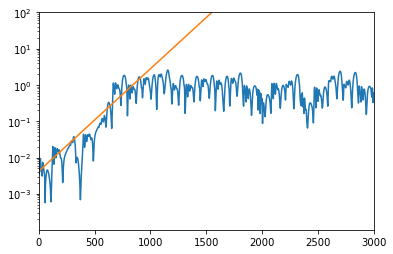

In [36]:
def compute_dst(state):
    dst = np.zeros((1, state.shape[1]))
    for i in np.arange(0,state.shape[1]):
        dst[0,i] = distance.euclidean(state[0,i,:], state[1,i,:]) #euclidean distance is standard dist. 
    return(dst.T) #return the transpose for this to make sense 


dst = compute_dst(state3)
plt.semilogy(t, dst)
D0 = np.mean(dst[0])

lyaponov = 0.0065
plt.semilogy(t, D0*np.exp(lyaponov*t))
plt.ylim(0,100)
plt.xlim(0,3000)

## Excercise 3

Plot the Lorenz Map of the herbivores in the Holling-Tanner system using the abovementioned parameters.  

What happens at an Nth peak height of ~0.29? What does it represent?



(0.0, 2000.0)

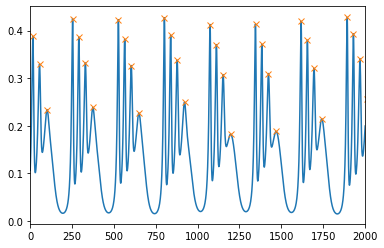

In [37]:
z = state3[0,:,1]
peaks, _ = find_peaks(z, height = 0.18) #all peaks are cleanly above 10
plt.plot(z)
plt.plot(peaks, z[peaks], "x")
plt.xlim(0,2000)

Text(0.5, 0, 'Nth Z peak height')

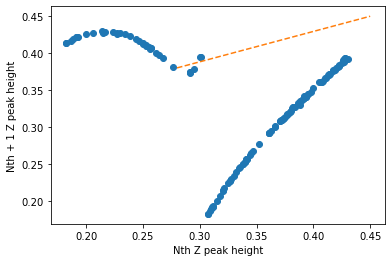

In [38]:
firstpeak = z[peaks[:-1]]
secondpeak = z[peaks[1:]]

plt.plot(firstpeak, secondpeak, 'o')
plt.plot(np.linspace(0.28,0.45), np.linspace(0.38, 0.45), '--')

plt.ylabel('Nth + 1 Z peak height')
plt.xlabel('Nth Z peak height')


#### Answer: 
* There is an increase at an minimum at an Nth peak height of 0.29, at which point there is an increase towards the Nth+1 peak

Who did you work with:
* Dylan Hallum 
* Brina Aceves 